In [1]:
from core.layer import *
from core.voiceHandler import make_batch
from tensorflow.keras import Sequential
import tensorflow as tf
from IPython.display import Audio
inputs,targets = make_batch('data/voice.wav')
inputs.shape

(1, 35315, 1)

In [2]:
Audio(inputs.reshape(inputs.shape[1]), rate=44100)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
model = generate_model((inputs.shape[1],inputs.shape[-1]))
model.summary()

Model: "my_wavenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35315, 1)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 35315, 256)   1024        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 35315, 256)   196864      conv1d[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_Sigmoid (TensorFlow [(None, 35315, 256)] 0           conv1d_1[0][0]                   
_________________________________________________________________________________________

In [5]:
def cost(y,y_pred):
    costs = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=y_pred)
    cost = tf.reduce_mean(costs)
    return cost

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=cost,optimizer= opt) 

In [7]:
model.fit(inputs,targets,epochs=1000)

1/1 [==============================] - 0s 435ms/step - loss: 0.8660
Epoch 813/1000
1/1 [==============================] - 0s 433ms/step - loss: 0.8542
Epoch 814/1000
1/1 [==============================] - 0s 436ms/step - loss: 0.8429
Epoch 815/1000
1/1 [==============================] - 0s 435ms/step - loss: 0.8321
Epoch 816/1000
1/1 [==============================] - 0s 434ms/step - loss: 0.8216
Epoch 817/1000
1/1 [==============================] - 0s 436ms/step - loss: 0.8118
Epoch 818/1000
1/1 [==============================] - 0s 434ms/step - loss: 0.8016
Epoch 819/1000
1/1 [==============================] - 0s 435ms/step - loss: 0.7917
Epoch 820/1000
1/1 [==============================] - 0s 434ms/step - loss: 0.7827
Epoch 821/1000
1/1 [==============================] - 0s 434ms/step - loss: 0.7743
Epoch 822/1000
1/1 [==============================] - 0s 436ms/step - loss: 0.7659
Epoch 823/1000
1/1 [==============================] - 0s 435ms/step - loss: 0.7574
Epoch 824/1000
1/1 

In [8]:
pred = []
a = model.predict(inputs)
for id_ in a[0]:
    pred.append(np.argmax(id_))

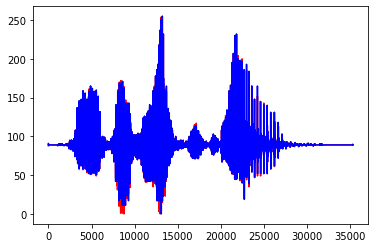

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(targets[0] , color='r', label='Real');
plt.plot(pred , color='b', label='Predictions');

In [10]:
p_decode = np.array(pred).reshape(1,-1)
bins = np.linspace(-1, 1, 256)
p_decode =  bins[p_decode].reshape(1, -1, 1)

In [11]:
Audio(p_decode.reshape(p_decode.shape[1]), rate=44100)